In order to successfully complete this assignment, you must follow all the instructions in this notebook and upload your edited ipynb file to [D2L](http://d2l.msu.edu/) with your answers on or before **10:00am on Friday, February 18th**.

**BIG HINT:** Read the entire homework before starting.  

# Homework 2: Affine Transform





In [29]:
# Here are some libraries you may need to use
%matplotlib inline
import matplotlib.pylab as plt

import numpy as np
import sympy as sym



---
<a name=Reading-in-example-image-files></a>
# 1.  (25pts) Linear Transform


In class, we talked about different types of transformations: rotation, shearing, translation, scaling.
In this problem, we focus on the two dimensional case. Then we know that the transformation can be expressed as a $2\times 3$ matrix, which has 6 unknowns. 

Assume that a linear transform maps $(1,1)$ to $(-3,2)$, $(3,1)$ to $(-5,4)$, and $(1,3)$ to $(-7,2)$. We need to find  the $2\times 3$ matrix $M$ to express the transform.

$$\begin{bmatrix}x_{\mbox{target}}\\y_{\mbox{target}}\end{bmatrix}=\begin{bmatrix}m_{11}&m_{12}&m_{13}\\m_{21}&m_{22}&m_{23}\end{bmatrix}\begin{bmatrix}x\\y\\1\end{bmatrix}$$

The following code shows the three points before the mapping (in green) and the three target points after the mapping (in red).

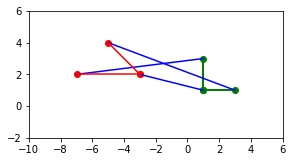

In [30]:
# Define some points
x = [1.0, 3.0, 1.0, 1.0, 1.0]
y = [1.0, 1.0, 1.0, 3.0,1.0]
con = [ 1.0 for i in range(len(x))] 
p = np.matrix([x,y,con])


mp = p.copy()

fig = plt.figure(figsize=plt.figaspect(0.4))
ax1 = fig.add_subplot(1, 2, 1)

#Plot Points
plt.scatter(x,y, color='green');
plt.plot(x,y, color='green');

plt.axis('scaled');
plt.axis([-10,6,-2,6]);

x2 = [-3.0, -5.0, -3.0, -7.0]
y2 = [2.0, 4.0, 2.0, 2.0]

#Plot Points after transform
plt.scatter(x2,y2, color='red');
plt.plot([x[0],x2[0]],[y[0],y2[0]], color='blue');
plt.plot([x[1],x2[1]],[y[1],y2[1]], color='blue');
plt.plot([x[3],x2[3]],[y[3],y2[3]], color='blue');
plt.plot([x2[0],x2[1]],[y2[0],y2[1]], color='red');
plt.plot([x2[0],x2[3]],[y2[0],y2[3]], color='red');  

&#9989;  **<font color=red>QUESTION 1a:</font>** (5pts)  Write down a system of $6$ equations for the $6$ unknowns in the matrix $M$. Put down the system in the row form.

m11 + m12 + m13 = -3

m21 + m22 + m23 =  2

3m11 + m12 + m13 = -5

3m21 + m22 + m23 = 4

m11 + 3m12 + m13 = -7

m21 + 3m22 + m23 = 2

&#9989;  **<font color=red>QUESTION 1b:</font>** (10pts)  Use Python to find the 6 values in the matrix $M$ based on the above system of equations, and store them in a $2\times 3$ `numpy.matrix` varibale named `M`.

In [31]:
##Edit this cell to answer the question.
M = np.matrix([[1,1,1,0,0,0,-3],[0,0,0,1,1,1,2],[3,1,1,0,0,0,-5],[0,0,0,3,1,1,4],[1,3,1,0,0,0,-7],[0,0,0,1,3,1,2]])
sym.Matrix(M).rref()
M = np.matrix([[-1,-2,0],[1,0,1]])

In [32]:
from answercheck import checkanswer
checkanswer.matrix(M,'826b8e8cedae0a1b5e6524f655d51b4a');

Testing Answer
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 1c:</font>** (5pts)  Given the transform matrix $M$, what is the resulting point of $(3,3)$ after the transform?  Use matrix-vector multiplication to find the resulting point and store it in ```y4``` as a  $2\times 1$ ```numpy.matrix```.  Check that the resulting four end points form a parallellogram by showing that ```y4-y3=y2-y1``` (see the code provided in the cell).

In [33]:

###Start your coding###
x = np.matrix([[3,3,1]]).T
y4 = M * x
###End your coding###
y1 = np.matrix([[-3],[2]])
y2 = np.matrix([[-5],[4]])
y3 = np.matrix([[-7],[2]])
np.allclose(y4 - y3,   y2 - y1)

True

In [34]:
from answercheck import checkanswer
checkanswer.vector(y4,'c3269727a1029f9e2be7e1b29ac580a3');

Testing Answer
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 1d:</font>** (5pts)  Use the geometric meanings to determine which properties/shapes each operation preserves respectively. Change the entries of form below. 

|                           | Rotation | Shearing | Translation | Scaling |
|   --- | --- | ----------- | --- | ----------- |
|  Angle between two lines  |    T  |   F   |   T    |   T   |
|              Origin       |    T  |   T   |   F    |   T   |
|Distance between two points|    T  |   F   |   T    |   F   |
|         Parallelograms    |    T  |   T   |   T    |   T   |
|  Area of a  Parallelogram |    T  |   T   |   T    |   F   |

---
<a name=Stitch-Images-together></a>
# 2.  (35pts) Inverse Transform and Combined Transform



Again we consider a tranform without the translation. However, we consider it in three dimensions now.

&#9989;  **<font color=red>QUESTION 2a:</font>** (9pts)  Use python code to construct the following three $3\times 3$ transformation matrices: 
+ Rotation matrix `Rz` with angle `degreez`$=30^\circ$ (rotate about $z$ axis)
+ Rotation matrix `Rx` with angle `degreex`$=45^\circ$ (rotate about $x$ axis)
+ Shearing matrix `SH` with parameter `sh`$=1.0$ (adding the $x$ component to the $z$ component)

In [35]:
## Finish the code in this cell.
degreez = 30
theta1 = degreez * np.pi / 180
Rz = np.matrix([[np.cos(theta1), -np.sin(theta1),0],[np.sin(theta1),np.cos(theta1),0],[0,0,1]])

degreex = 45
theta2 = degreex * np.pi / 180
Rx = np.matrix([[1,0,0],[0,np.cos(theta2), -np.sin(theta2)],[0,np.sin(theta2),np.cos(theta2)]])

sh = 1.0 

SH  = np.matrix([[1,0,0],[0,1,0],[sh,0,1]])

In [36]:
checkanswer.matrix(Rz,'55af1d4adf3962b813bc608b0ef40d37');

Testing Answer
Answer seems to be correct



In [37]:
checkanswer.matrix(Rx,'13cb95088dae5954809c5e0b029233d3');

Testing Answer
Answer seems to be correct



In [38]:
checkanswer.matrix(SH,'bbb2bcd6abe86fd4d8434ea1a1eb5460');

Testing Answer
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 2b:</font>** (6pts)  Use the geometric meanings to find the inverse tranform matrices for the three matrices and call them `Rx_inv`, `Rz_inv`, and `SH_inv`, respectively. Feel free to use your induition based on what the transforms do to find the inverses. Check that the matrices you found are indeed the inverses you are looking for by multiplying each matrix with its inverse.

In [39]:
##complete the code in this cell

Rz_inv = np.linalg.inv(Rz)

Rx_inv = np.linalg.inv(Rx)

SH_inv = np.linalg.inv(SH)


In [40]:
checkanswer.matrix(Rz_inv,'84b1a7ebd71e740c41730448de079684');

Testing Answer
Answer seems to be correct



In [41]:
checkanswer.matrix(Rx_inv,'0c1aff2bb0a3734448b8d091e2540f34');

Testing Answer
Answer seems to be correct



In [42]:
checkanswer.matrix(SH_inv,'8eeab2f49c3c421842cb1a15595a8b43');

Testing Answer
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 2c:</font>** (5pts) Print the product of the two matrices `SH*Rx` and `Rx*SH`. Are they the same? Can you imagine a geometric reason why this is the case? 

In [43]:
### Put your answer here
print(SH*Rx)
print(Rx*SH)

# No they are not same. After every transformation of a matrix it changes to a new point.

[[ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 1.          0.70710678  0.70710678]]
[[ 1.          0.          0.        ]
 [-0.70710678  0.70710678 -0.70710678]
 [ 0.70710678  0.70710678  0.70710678]]


&#9989;  **<font color=red>QUESTION 2d:</font>** (5pts)  Combine the three matrices into one transfrom matrix. You can choose any order for the three matrices. Then use the `rref` function in `sympy` to find the inverse of the matrix. (Hint: you can use `numpy.concatenate` to join two $3\times 3$ matrices into one $3\times 6$ matrix.)

In [44]:
### Put your answer here
M = Rx*Rz*SH
A = np.concatenate((M,np.matrix('0,0,1;0,1,0;1,0,0')),axis = 1)
sym.Matrix(A).rref

<bound method MatrixReductions.rref of Matrix([
[ 0.866025403784439,              -0.5,                0.0, 0.0, 0.0, 1.0],
[-0.353553390593274, 0.612372435695795, -0.707106781186547, 0.0, 1.0, 0.0],
[  1.06066017177982, 0.612372435695794,  0.707106781186548, 1.0, 0.0, 0.0]])>

&#9989;  **<font color=red>QUESTION 2e:</font>** (5pts)  As we know, if $A$, $B$ and $C$ are invertible, we have 
$$(ABC)^{-1}=C^{-1}B^{-1}A^{-1}.$$
Based on this rule, use the inverse transformation matrices to construct the inverse of $M$ and check whether it is the same as you obtained in the previous question.

In [45]:
### Put your answer here

M_INV = SH_inv * Rz_inv * Rx_inv
print(M_INV)

[[ 0.8660254   0.35355339  0.35355339]
 [-0.5         0.61237244  0.61237244]
 [-0.8660254  -1.06066017  0.35355339]]


&#9989;  **<font color=red>QUESTION 2f:</font>** (5pts)  Suppose that under this transformation matrix $M$ we know that some point ends up at (1,1,1). Where was this point before the transformation matrix was applied?

In [46]:
### Put your answer here
B = np.matrix('1;1;1')
x = M_INV * B
print(x)

[[ 1.57313218]
 [ 0.72474487]
 [-1.57313218]]


---
<a name=Build-an-combined-affine-transform-function.></a>
# 3. (25 points) Cryptography

In this problem, we use a matrix to encode a message. There will be two matrices: encoding matrix and decoding matrix. 

Assume that we want to send the following message 
$$\mbox{EXAM AT TWO}$$
We first assign a number to each letter of the alphabet. For example, we can assign 1 to A, 2 to B, and so on. In addition, we assign 27 to the space between two words. So this message can be decribed as a vector 
$$[5,24,1,13,27,1,20,27,20,23,15].$$
Then we design an encoding matrix. For this example, we let the encoding matrix be 
$$\begin{bmatrix}
 3 & -4 & 6\\
-2 & 3  & -4\\
-1 & 1  & -1
\end{bmatrix}.$$
Because the encoding matrix has three rows and three columns, we break the message vector into many vectors of three elements. If the number is not divided by three, we add additional spaces at the end of the message. Therefore we have the new messge vector
$$[5,24,1],[13,27,1],[20,27,20],[23,15,27],$$
which has 4 blocks.

For the encoding part, we just apply matrix-vector multiplication block by block. 

&#9989;  **<font color=red>QUESTION 3a:</font>** (5pts) Use python code to encode the message and store the output vector into a matrix named `Message_encoded` with three rows, and each column corresponds to the encoded message of three characters in one block.

In [47]:
##Put your answer here
encoding_matrix = np.matrix([[3,-4,6],[-2,3,-4],[-1,1,-1]])
encoding_1 = np.matrix([[5],[24],[1]])
encoding_2 = np.matrix([[13],[27],[1]])
encoding_3 = np.matrix([[20],[27],[20]])
encoding_4 = np.matrix([[23],[15],[27]])

x1 = encoding_matrix * encoding_1
x2 = encoding_matrix * encoding_2
x3 = encoding_matrix * encoding_3
x4 = encoding_matrix * encoding_4

Message_encoded = np.zeros((3,4))

for i in range (0,3):
    Message_encoded[i,0] = x1.item(i)
    Message_encoded[i,1] = x2.item(i)
    Message_encoded[i,2] = x3.item(i)
    Message_encoded[i,3] = x4.item(i)

In [48]:
checkanswer.matrix(Message_encoded,'f999fdbc134cca1eadcdfcb81e75d589');

Testing Answer
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 3b:</font>** (5pts) Find the decoding algorithm that will decode the encoded message and store the square matrix involved in that algorithm as `Decode`.

In [49]:
##Put your code here
Decode = np.linalg.inv(encoding_matrix)

In [50]:
checkanswer.matrix(Decode,'63d53e9cfc0429f46f5755acba4b51a7');

Testing Answer
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 3c:</font>** (5pts) Use the decoding algorithm to decode the message you just encoded. 

In [51]:
#Put your code here
x1 = np.zeros((3,1))
x2 = np.zeros((3,1))
x3 = np.zeros((3,1))
x4 = np.zeros((3,1))

for i in range (0,3):
    x1[i,0] = Message_encoded.item(i,0)
    x2[i,0] = Message_encoded.item(i,1)
    x3[i,0] = Message_encoded.item(i,2)
    x4[i,0] = Message_encoded.item(i,3)
    
decode_1 = Decode * x1
decode_2 = Decode * x2
decode_3 = Decode * x3
decode_4 = Decode * x4

print(decode_1)
print(decode_2)
print(decode_3)
print(decode_4)

[[ 5.]
 [24.]
 [ 1.]]
[[13.]
 [27.]
 [ 1.]]
[[20.]
 [27.]
 [20.]]
[[23.]
 [15.]
 [27.]]


### &#9989;  **<font color=red>QUESTION 3d:</font>** (5pts) Use the decoding matrix `Decode` to decode the following message
$$[33, -18, -2, 89, -53, -16, 155, -102, -38, 184, -121, -36]. $$

In [4]:
import numpy as np
Decode = np.linalg.inv([[3,-4,6],[-2,3,-4],[-1,1,-1]])
Decode*(Message_encoded)
Message_encoded2 = np.matrix([
                              [  33,   89,  155,  184],
                              [ -18,  -53, -102, -121],
                              [  -2,  -16,  -38,  -36]
                             ]
                            )

result = Decode * Message_encoded2
result

NameError: name 'Message_encoded' is not defined

&#9989;  **<font color=red>QUESTION 3e:</font>** (5pts) Assume that the encode matrix is implemented in a machine, but you forgot the corresponding decode matrix. You only know that the encode matrix is $3\times 3$. In this case, you can still find the encode matrix and encode vector using the pairs of original message and encoded message. How many pairs do you need to recover this matrix? Explain your answer

we need 9 pairs to recover the matrix since there are 9 unknowns in a 3x3 matrix. We would require 9 equation to recover the matrix.



---
<a name=Build-an-combined-affine-transform-function.></a>
# 4. (15 points) Conics

---
## Working with conic sections

<img alt="Figure showing how different slices though a conic section results in different shapes." src='https://dr282zn36sxxg.cloudfront.net/datastreams/f-d%3Ac88f77a9cc7914d68baf3dbb272db78f307dbd135f37b70d23fe72a1%2BIMAGE_TINY%2BIMAGE_TINY.1'>


Circles, ellipses, parabolas, and hyperbolas are all examples of __conic sections__ and can be realized as the intersection of a plane with a cone. They are all realized by different values of $a,b,c,d,e,f$ in the formula:

$$ Q(x,y) = ax^2 + bxy + c y^2 +dx + ey + f =0.$$

In this quiz we will discuss how we can represent a conic section by a matrix, and discuss varius ways we can use this matrix representation. 

&#9989;  **<font color=red>QUESTION 4a:</font>** 
(5 pts) Multiply the following three matrices by hand $$ \begin{bmatrix} x & y \end{bmatrix}\begin{bmatrix} 1 & -1 \\ -1 & 4 \\ \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}$$

**Note.** Your answer will be a $1 \times 1$ matrix, which we will treat as a scalar. A perfect answer will use latex, but it is okay for you to just type your answer legibly in plain text. 

**Put your answer to the above question here**

[x^2 -xy -yx + 4y^2]

##ANSWER##

$$ x^2 - 2xy + 4y^2$$


possible code answer:

``x,y = sym.symbols('x,y')
(sym.Matrix([[x,y]])* sym.Matrix([[1,-1],[-1,4]]) * sym.Matrix([x,y])).expand()``


##ANSWER##

---
In a similar fashion to Question 1 if we define $$ x = \begin{bmatrix} x \\ y \\ 1 \end{bmatrix} \quad \text{ and } \quad A_Q = \frac{1}{2} \cdot \begin{bmatrix} 2a & b & d \\ b & 2c & e \\ d & e & 2f \end{bmatrix}$$ then 

$$ x^\top A_Q x =Q(x,y) = ax^2 + bxy + c y^2 +dx + ey + f .$$

Define $A_{33}$ to be the upper left $2 \times 2$ submatrix that you get from deleting the last row and column of $A_Q$. That is $$A_{33} = \frac{1}{2} \cdot \begin{bmatrix} 2a & b  \\ b & 2c \end{bmatrix}$$

**These formulas for $Q(x,y)$, $A_Q$, and $A_{33}$ will be used throughout the rest of Question 4.**

---

It can be shown that if $\det(A_Q) \neq 0$ then we can classify which type of conic section (ellipse, parabola, or hyperbola) the equation represents. Specifically,

- If $\det(A_{33} ) < 0$ then $Q$ is a hyperbola,
- If $\det(A_{33} ) = 0$ then $Q$ is a parabola,
- If $\det(A_{33} ) > 0$ then $Q$ is a ellipse.

&#9989;  **<font color=red>QUESTION 4b:</font>** (5 pts)
Which type of conic section does the matrix $A_Q$ represent if $A_Q = 
\left[
\begin{matrix}
41 &  9  &  -191\\
9  &  41 &  -159\\
-191& -159 & 441
\end{matrix}
\right]\,?$ 

Save $\det(A_{33})$ as ``det33`` for the answercheck. 

**The type of conic section Q represents is ....**

In [53]:
# Do your work for the above question here. 
AQ = np.matrix([[ 41.,  9.,  -191.],
                [ 9.,  41.,  -159.],
                [ -191., -159., 441.]])
A33 = np.matrix([[41,9],[9,41]])
det33 = np.linalg.det(A33)

In [54]:
from answercheck import checkanswer
checkanswer.detailedwarnings = False
checkanswer.float(det33,'6febd8047eb9ddc4d9caf141403a586a')

Testing Answer
Answer seems to be correct



----
Provided that the conic section is not a parabola, we can find the center point $(c_1,c_2)$ by solving the equation $ A_{33}x_c = b$  where $x_c = \begin{bmatrix}c_1 \\c_2\end{bmatrix}$ and  $b = \left(-\frac{1}2\right)\cdot \begin{bmatrix}d \\e\end{bmatrix}$.

&#9989;  **<font color=red>QUESTION 4c:</font>** (5 pts) Solve the matrix equation given above to find the center of the ellipse $$Q(x,y) = 1.98 x^2 + 1.08 xy + 1.35 y^2 + 6.66 x - 0.54 y - 2.07$$ Save your answer to ``x_c`` in the form of a vector. 

**Hint.** Your $A_{33}$ is different than the one in Question 2.

In [55]:
##Your answer here
A33 = 1/2*np.matrix([[2*1.98,1.08],[1.08,2*1.35]])
b = -1/2* np.matrix([[6.66],[-0.54]])
x_c = np.linalg.solve(A33,b)

In [56]:
from answercheck import checkanswer
checkanswer.detailedwarnings = False
checkanswer.vector(x_c, '4b37fbc12fe5f13ad053447009defe68')

Testing Answer
Answer seems to be correct



---------
### Congratulations, we're done!
